In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier  # For classification
from sklearn.ensemble import RandomForestRegressor  # For regression
from sklearn.metrics import accuracy_score 

In [19]:
#data = pd.read_csv("Model_csv.csv")
#data = pd.read_csv("cleaned_data.csv")
data = pd.read_csv("df_clean_top10.csv")
data

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Highest Rank,Previous Popularity,Number Songs Previous,Number of Artists,Top 10,Previous Top Rank Avg
0,197,I Miss You,"Grey, Bahari",2017-02-01,-0.167946,0.749917,0.197372,-0.314832,0.523079,-0.167422,...,4,2.000000,1sl5tSzfK1JrcQIcA8rYDy,https://open.spotify.com/track/1sl5tSzfK1JrcQI...,175,0.0,0.0,2.0,False,175.000
1,188,Location,Khalid,2017-02-01,0.408735,-1.086565,-1.768777,2.427089,0.371378,-0.167422,...,13,13.000000,152lZdxL1OR0ZMW6KquMif,https://open.spotify.com/track/152lZdxL1OR0ZMW...,33,0.0,0.0,1.0,False,33.000
2,199,Magic,"Thomas Gold, Jillian Edwards",2017-02-01,-0.308764,1.437869,0.193593,-0.720736,-0.746421,-0.155459,...,2,1.000000,5abwHwUhywLGNli5NDcEN7,https://open.spotify.com/track/5abwHwUhywLGNli...,168,0.0,0.0,2.0,False,168.000
3,179,Body Like A Back Road,Sam Hunt,2017-02-02,0.381912,-1.034094,-0.434391,-0.836709,0.838458,-0.167422,...,22,22.000000,7mldq42yDuxiUNn08nvzHO,https://open.spotify.com/track/7mldq42yDuxiUNn...,55,0.0,0.0,1.0,False,55.000
4,165,Believer,Imagine Dragons,2017-02-02,0.697075,0.884009,0.485225,-0.198860,-0.738436,-0.167422,...,36,36.000000,0CcQNd8CINkwQfe1RDtGV6,https://open.spotify.com/track/0CcQNd8CINkwQfe...,15,0.0,1.0,1.0,False,15.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,171,Bye,Peso Pluma,2023-05-26,0.717192,1.029762,-0.241649,-0.704169,1.317515,-0.167422,...,30,30.000000,6n2P81rPk2RTzwnNNgFOdb,https://open.spotify.com/track/6n2P81rPk2RTzwn...,85,0.0,1.0,1.0,False,53.500
7497,184,Stand By Me (feat. Morgan Wallen),"Lil Durk, Morgan Wallen",2023-05-26,0.542846,-0.311162,-0.592174,-0.811857,-0.710491,-0.167422,...,17,8.500000,1fXnu2HzxbDtoyvFPWG3Bw,https://open.spotify.com/track/1fXnu2HzxbDtoyv...,184,0.0,1.0,2.0,False,132.500
7498,149,Friesenjung,"Ski Aggu, Joost, Otto Waalkes",2023-05-26,0.770837,2.003389,0.380666,-0.124306,-0.874169,-0.167422,...,52,17.333333,6tAKikIvnoWfUeZrfkopLL,https://open.spotify.com/track/6tAKikIvnoWfUeZ...,149,0.0,0.0,3.0,False,149.000
7499,176,"Phir Aur Kya Chahiye (From ""Zara Hatke Zara Ba...","Sachin-Jigar, Arijit Singh, Amitabha Bhattacharya",2023-05-27,-0.798272,-0.486065,-0.009226,-0.787006,1.173798,-0.167422,...,25,8.333333,5QW9K4A1gMnIi94YUxtsfM,https://open.spotify.com/track/5QW9K4A1gMnIi94...,123,0.0,0.0,3.0,False,123.000


c:\Users\1juli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

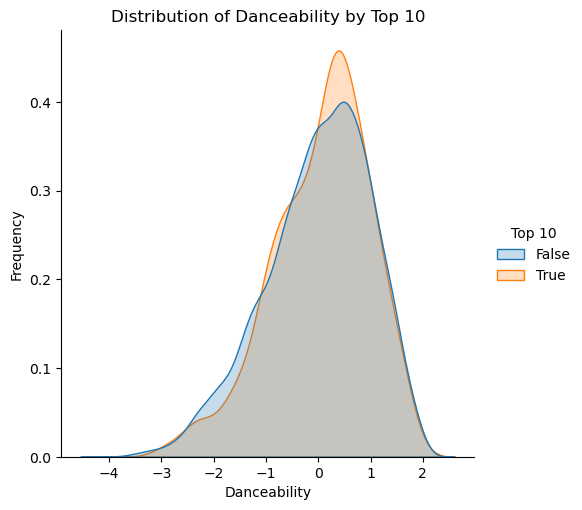

c:\Users\1juli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

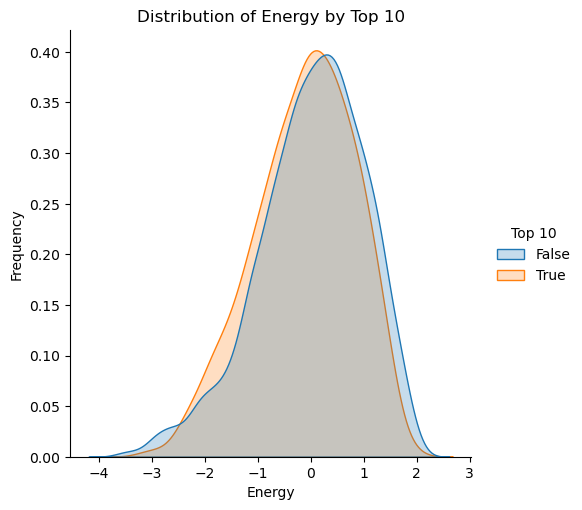

c:\Users\1juli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

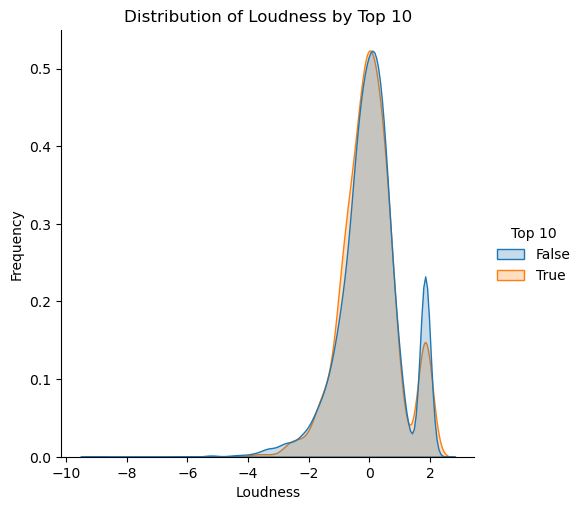

c:\Users\1juli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

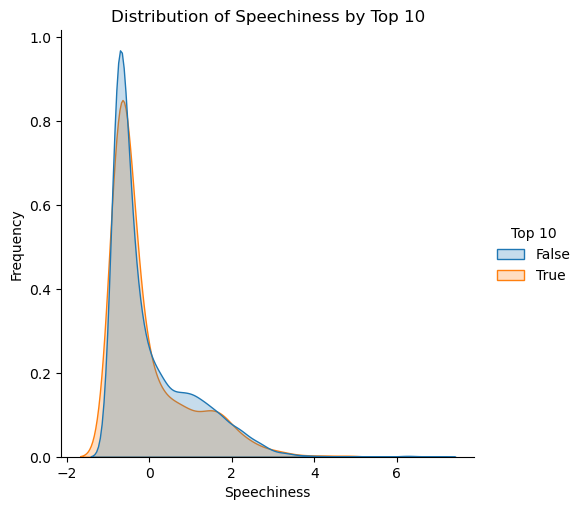

c:\Users\1juli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

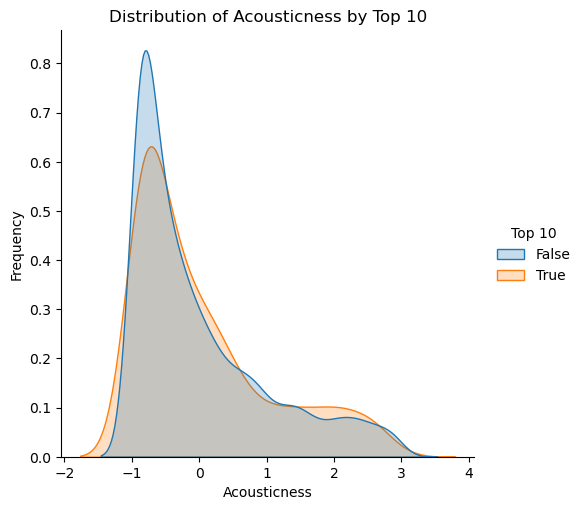

c:\Users\1juli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

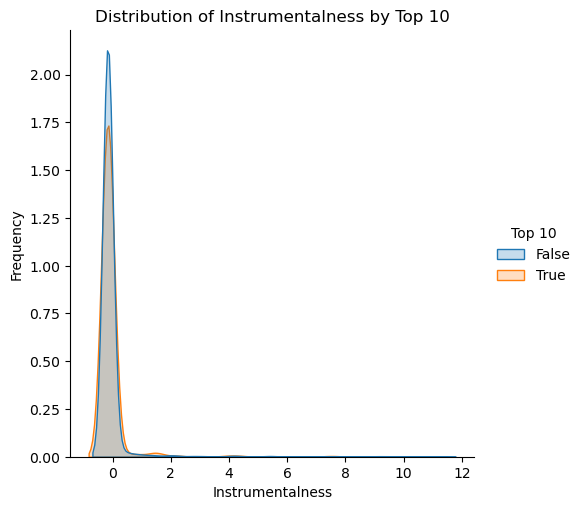

c:\Users\1juli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

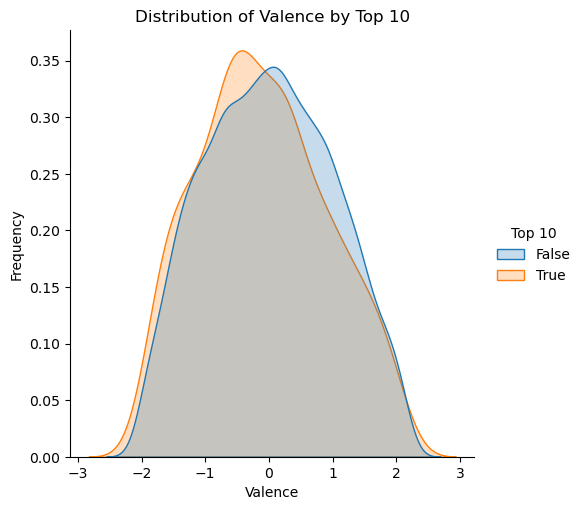

In [20]:
characteristics = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Valence"]
for characteristic in characteristics:
    plt.figure(figsize=(8, 6))
    sns.displot(data=data[characteristics], x=characteristic, hue=data['Top 10'], kind='kde', fill=True, common_norm=False)

    plt.xlabel(characteristic)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {characteristic} by Top 10')
    plt.show()

In [21]:
data["Top 10"].value_counts()

Top 10
False    6808
True      693
Name: count, dtype: int64

In [22]:
data.columns

Index(['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Valence', '# of Artist', 'Artist (Ind.)', '# of Nationality',
       'Nationality', 'Continent', 'Points (Total)',
       'Points (Ind for each Artist/Nat)', 'id', 'Song URL', 'Highest Rank',
       'Previous Popularity', 'Number Songs Previous', 'Number of Artists',
       'Top 10', 'Previous Top Rank Avg'],
      dtype='object')

In [23]:
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Valence', 'Previous Popularity', "Number of Artists", 'Number Songs Previous', 'Previous Top Rank Avg']
song_charact = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness','Valence']
label = ['Top 10']



In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# baseline model with song characteristcs

In [56]:
#X = data[features]
X = data[song_charact]
y = data[label]

# # Use SMOTE to oversample the minority class in the training set
# smote = SMOTE(sampling_strategy=1, random_state=42)
# X,y = smote.fit_resample(X,y)

X = X.values
y = y.values.reshape(-1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42, stratify=y_train)



# Use SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy=1, random_state=42)
X_train,y_train = smote.fit_resample(X_train,y_train)


# Use SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy=1, random_state=42)
X_test,y_test = smote.fit_resample(X_test,y_test)


# Use SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy=1, random_state=42)
X_train_val,y_train_val = smote.fit_resample(X_train_val,y_train_val)

# Use SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy=1, random_state=42)
X_val,y_val = smote.fit_resample(X_val,y_val)

Accuracy: 0.5528007346189164
F1 score: 0.5694076038903626
ROC AUC: 0.5574713661365303
Classification Report:
               precision    recall  f1-score   support

       False       0.56      0.51      0.53      1089
        True       0.55      0.59      0.57      1089

    accuracy                           0.55      2178
   macro avg       0.55      0.55      0.55      2178
weighted avg       0.55      0.55      0.55      2178

Confusion Matrix:
 [[560 529]
 [445 644]]


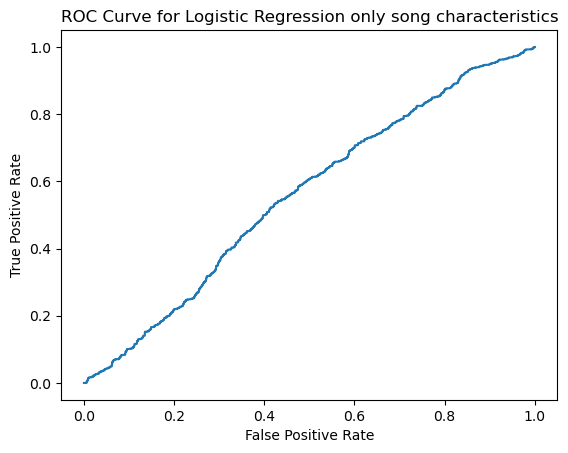

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score


# Create a Logistic Regression model
lr = LogisticRegression()

# Fit the model to your training data
lr.fit(X_train_val, y_train_val)

# Make predictions on the test data
y_pred = lr.predict(X_val)
y_probas = lr.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_probas)
report = classification_report(y_val, y_pred)
confusion = confusion_matrix(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 score:", f1)
print('ROC AUC:', roc_auc)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)


fpr, tpr, _ = roc_curve(y_val, y_probas)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression only song characteristics')
plt.show()



# baseline model with popularity 

In [58]:
X = data[features]
#X = data[song_charact]
y = data[label]

# # Use SMOTE to oversample the minority class in the training set
# smote = SMOTE(sampling_strategy=1, random_state=42)
# X,y = smote.fit_resample(X,y)

X = X.values
y = y.values.reshape(-1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42, stratify=y_train)



# Use SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy=1, random_state=42)
X_train,y_train = smote.fit_resample(X_train,y_train)


# Use SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy=1, random_state=42)
X_test,y_test = smote.fit_resample(X_test,y_test)


# Use SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy=1, random_state=42)
X_train_val,y_train_val = smote.fit_resample(X_train_val,y_train_val)

# Use SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy=1, random_state=42)
X_val,y_val = smote.fit_resample(X_val,y_val)

Accuracy: 0.8168044077134986
F1 score: 0.8249232119350592
ROC AUC: 0.9049725909230042
Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.77      0.81      1089
        True       0.79      0.86      0.82      1089

    accuracy                           0.82      2178
   macro avg       0.82      0.82      0.82      2178
weighted avg       0.82      0.82      0.82      2178

Confusion Matrix:
 [[839 250]
 [149 940]]


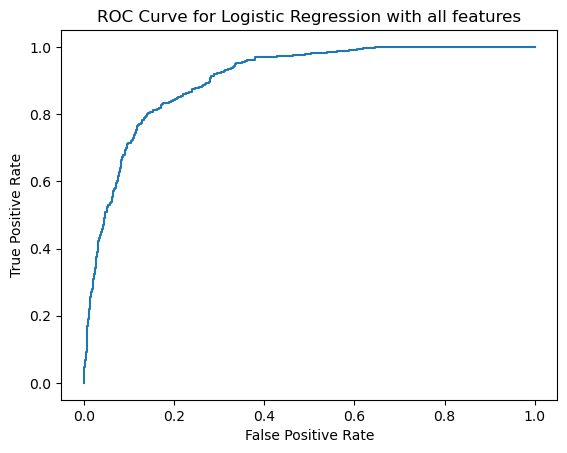

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score


# Create a Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Fit the model to your training data
lr.fit(X_train_val, y_train_val)

# Make predictions on the test data
y_pred = lr.predict(X_val)
y_probas = lr.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_probas)
report = classification_report(y_val, y_pred)
confusion = confusion_matrix(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 score:", f1)
print('ROC AUC:', roc_auc)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)


fpr, tpr, _ = roc_curve(y_val, y_probas)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression with all features')
plt.show()



# other models with all features 

Accuracy: 0.8213957759412305
F1 score: 0.8302051505892624
ROC AUC: 0.905798952881347
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.77      0.81      1089
        True       0.79      0.87      0.83      1089

    accuracy                           0.82      2178
   macro avg       0.82      0.82      0.82      2178
weighted avg       0.82      0.82      0.82      2178

Confusion Matrix:
 [[838 251]
 [138 951]]


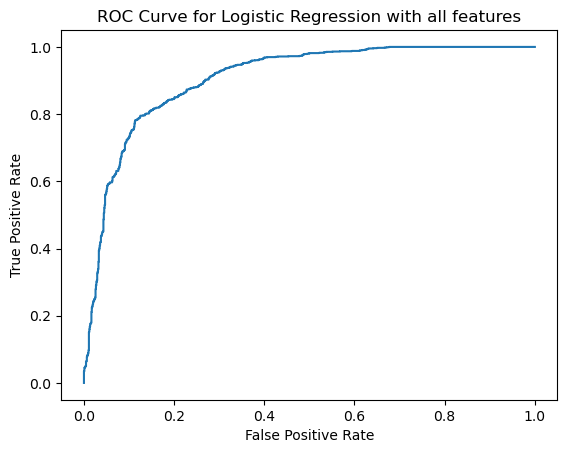

In [60]:
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score


# Create a Logistic Regression model
svc = SVC(kernel='linear', probability=True)

# Fit the model to your training data
svc.fit(X_train_val, y_train_val)

# Make predictions on the test data
y_pred = svc.predict(X_val)
y_probas = svc.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_probas)
report = classification_report(y_val, y_pred)
confusion = confusion_matrix(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 score:", f1)
print('ROC AUC:', roc_auc)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)


fpr, tpr, _ = roc_curve(y_val, y_probas)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression with all features')
plt.show()

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Accuracy: 0.8076216712580349
F1 score: 0.7988478156505041
ROC AUC: 0.8571506871031038
Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.85      0.82      1089
        True       0.84      0.76      0.80      1089

    accuracy                           0.81      2178
   macro avg       0.81      0.81      0.81      2178
weighted avg       0.81      0.81      0.81      2178

Confusion Matrix:
 [[927 162]
 [257 832]]


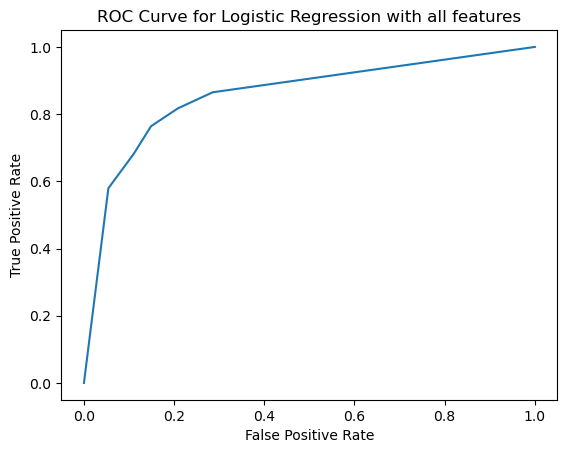

In [62]:
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score


# Create a Logistic Regression model
knn_clf = KNeighborsClassifier()

# Fit the model to your training data
knn_clf.fit(X_train_val, y_train_val)

# Make predictions on the test data
y_pred = knn_clf.predict(X_val)
y_probas = knn_clf.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_probas)
report = classification_report(y_val, y_pred)
confusion = confusion_matrix(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 score:", f1)
print('ROC AUC:', roc_auc)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)


fpr, tpr, _ = roc_curve(y_val, y_probas)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression with all features')
plt.show()

In [53]:
# Define the hyperparameter values to search over
n_estimators_values = [100, 200, 300]
max_depth_values = [None, 2, 5, 10]
min_samples_split_values = [2, 4, 6]
min_samples_leaf_values = [1, 2, 3]

# Initialize variables for best hyperparameters and best accuracy
best_n_estimators = None
best_max_depth = None
best_min_samples_split = None
best_min_samples_leaf = None
best_accuracy = 0
best_f1 = 0
best_roc_auc = 0

# Iterate over each combination of hyperparameters
for n_estimators in n_estimators_values:
    print(f'running for estimator {n_estimators}')
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                # Create a Random Forest classifier model with current hyperparameters
                model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                               min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                               random_state=42)
                
                # Fit the model on the training data
                model.fit(X_train_val, y_train_val)
                
                # Evaluate the model on the validation data
                accuracy = model.score(X_val, y_val)

                f1 = f1_score(y_val, model.predict(X_val))
                roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
                

                if f1>best_f1:
                    best_f1 = f1
                    best_n_estimators = n_estimators
                    best_max_depth = max_depth
                    best_min_samples_split = min_samples_split
                    best_min_samples_leaf = min_samples_leaf
                    

# Print the best hyperparameters and best accuracy
print("Best Hyperparameters:")
print("n_estimators:", best_n_estimators)
print("max_depth:", best_max_depth)
print("min_samples_split:", best_min_samples_split)
print("min_samples_leaf:", best_min_samples_leaf)
#print("Best Accuracy:", best_accuracy)
print("Best F1:", best_f1)


running for estimator 100
running for estimator 200
running for estimator 300
Best Hyperparameters:
n_estimators: 100
max_depth: 10
min_samples_split: 6
min_samples_leaf: 1
Best F1: 0.9135577797998179


In [54]:
# train the tuned forest on the whole data
model_tuned = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth,
                               min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf,
                               random_state=42)
model_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=6, random_state=42)

Accuracy: 0.8854625550660793
F1 score: 0.8847006651884701
ROC AUC: 0.954916972319794
Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.89      0.89      1362
        True       0.89      0.88      0.88      1362

    accuracy                           0.89      2724
   macro avg       0.89      0.89      0.89      2724
weighted avg       0.89      0.89      0.89      2724

Confusion Matrix:
 [[1215  147]
 [ 165 1197]]


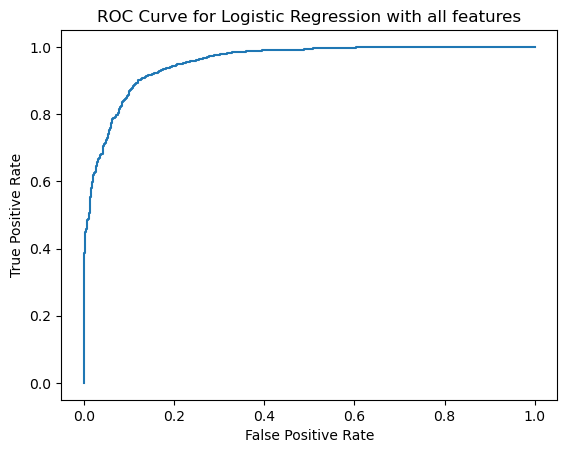

In [55]:
y_pred = model_tuned.predict(X_test)
y_probas = model_tuned.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probas)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 score:", f1)
print('ROC AUC:', roc_auc)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)


fpr, tpr, _ = roc_curve(y_test, y_probas)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression with all features')
plt.show()

In [42]:
# Create a Random Forest classifier model
model = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model to your training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.8601321585903083
Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.94      0.87      1362
        True       0.93      0.78      0.85      1362

    accuracy                           0.86      2724
   macro avg       0.87      0.86      0.86      2724
weighted avg       0.87      0.86      0.86      2724

Confusion Matrix:
 [[1282   80]
 [ 301 1061]]


ROC AUC: 0.9571737921041226


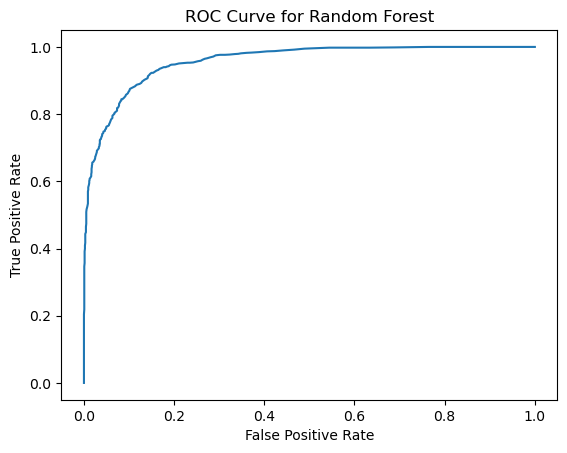

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

y_true = y_test
y_probas = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_true, y_probas)
print('ROC AUC:', roc_auc)

fpr, tpr, _ = roc_curve(y_true, y_probas)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()


In [44]:
# for random forest with default params

# Get the feature importances
feature_weights = model.feature_importances_

# Print the feature weights
for feature, weight in zip(features, feature_weights):
    print(f"{feature}: {weight}")


Danceability: 0.04379841812825787
Energy: 0.04507062043709119
Loudness: 0.05237445956811153
Speechiness: 0.054496295778927444
Acousticness: 0.04867244886434112
Instrumentalness: 0.013162924348666692
Valence: 0.04208159503152573
Previous Popularity: 0.09291496249257546
Number of Artists: 0.03681544271051042
Number Songs Previous: 0.1108671437287754
Previous Top Rank Avg: 0.45974568891121714


In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 5, 10],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

# Create a Random Forest classifier model
model = RandomForestClassifier(random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=5, n_iter=50, random_state=42)

# Fit the RandomizedSearchCV object to your training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 210}
Best Score: 0.9918979504963016


In [25]:
# Create a Random Forest classifier model
model_tuned = RandomForestClassifier(n_estimators=210, random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=3)

# Fit the model to your training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.766531713900135
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.99      0.81      1482
           1       0.98      0.54      0.70      1482

    accuracy                           0.77      2964
   macro avg       0.83      0.77      0.75      2964
weighted avg       0.83      0.77      0.75      2964

Confusion Matrix:
 [[1469   13]
 [ 679  803]]


In [10]:
pip install hypopt

  Using cached hypopt-1.0.9-py2.py3-none-any.whl (13 kB)
Note: you may need to restart the kernel to use updated packages.


In [60]:
X.shape

(14812, 10)

In [14]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_train_val = le.transform(y_train_val)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [15]:
len(X_train_val)

9478

In [16]:
# number of neurons in the hidden layer according to the equation
alpha = 2
len(X_train_val)/(alpha * (10 + len(le.classes_)))

394.9166666666667

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import tensorflow as tf

def create_mlp(activation = 'relu', num_neurons = 300, regularizer = tf.keras.regularizers.l2(0.01)):

    # Specify the model's architecture
    model_mlp = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(10,)),
        #tf.keras.layers.Flatten(input_shape = (10)),
        tf.keras.layers.Dense(num_neurons, activation=activation, kernel_regularizer=regularizer),
        tf.keras.layers.Dense(num_neurons, activation=activation, kernel_regularizer=regularizer),
        tf.keras.layers.Dense(num_neurons, activation=activation, kernel_regularizer=regularizer),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(le.classes_), activation='softmax'),
    ])

    # Compile model with loss, optimiser, and metrics
    model_mlp.compile(loss='sparse_categorical_crossentropy',
                optimizer="adam",
                metrics=['accuracy'])
    
    return model_mlp